In [702]:

import seaborn as sb
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import re
import math
from IPython.core.pylabtools import figsize


In [703]:
figsize(15, 15)


# Загрузка данных


Не смотря на то, что файл несет расширение таблиц excel, внутри него находится html разметка с нестандартной кодировкой windows-1251


Так же замечено, что при попытке переименовать файл, слетает внутренняя кодировка


In [615]:
_, df = pd.read_html('./Выгрузка 9 апреля.xls',
                     attrs={"class": "mtable"}, encoding='windows-1251')


In [616]:
df.head()


,№ п/п,№ документа,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


# Анализ и подготовка


Первое, что хочется сделать - перевести названия на английский


In [617]:
df.columns


Index(['№ п/п', '№ документа', 'Дата регистрации', 'Исх. № Дата', 'Адресат',
       'Автор', 'Краткое содержание', 'Примечание'],
      dtype='object')

In [618]:
name_dict = {
    '№ п/п': "row_number",
    '№ документа': "document_number",
    'Дата регистрации': "income_date",
    'Исх. № Дата': "send_document_and_date",
    'Адресат': "receiver",
    'Автор': "author",
    'Краткое содержание': "summary",
    'Примечание': "note"
}


In [619]:
df = df.rename(name_dict, axis=1)


In [620]:
df


,row_number,document_number,income_date,send_document_and_date,receiver,author,summary,note
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр 24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


Для начала посмотрим на то, какие типы данных и в каком количестве представлены


In [621]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   row_number              4967 non-null   int64 
 1   document_number         4965 non-null   object
 2   income_date             4965 non-null   object
 3   send_document_and_date  4967 non-null   object
 4   receiver                4967 non-null   object
 5   author                  4967 non-null   object
 6   summary                 4967 non-null   object
 7   note                    308 non-null    object
dtypes: int64(1), object(7)
memory usage: 310.6+ KB


Так как задача стоит в том, чтобы предсказывать получателя по содержанию письма, что можно сбросить остальные колонки, как ненужные


In [622]:
df = df.drop(columns=['note', 'row_number', 'document_number',
             'income_date', 'send_document_and_date', 'author'])


Теперь посмотрим, какие колонки сколько уникальных значений имеют. Если их число будет приближаться к количеству записей или будет только одно значение, то такие колонки будут сбрасываться


In [623]:
for column in df.columns:
    print(f'Column {column} has {len(df[column].unique())} unique values')


Column receiver has 161 unique values
Column summary has 3891 unique values


Но, скорее всего, поле document_number и часть поля outcome_document_and_date тоже будет сброшено


Далее перед дальнейшими преобразованиям, нужно разобраться с пропусками


In [624]:
def show_na_percentage():
    total_len = len(df)
    for column in df.columns:
        percentage = (df[column].isna().sum() / total_len) * 100
        print(f'Column {column} has {percentage}% nan values')


In [625]:
show_na_percentage()


Column receiver has 0.0% nan values
Column summary has 0.0% nan values


Перед тем как кодировать получателя, поработаю с ним, потому что там много значений, возможно кого то можно объединить или как либо разбить, что упростит дальнейшую работу модели


In [626]:
df.receiver.value_counts()


receiver
Глушко Д.Е.                                                1559
Уразов Р.Н.                                                1467
Крайчинская С.Б.                                            315
Лысова С.И.                                                 234
Тымчиков А.Ю.                                               229
                                                           ... 
Миронова С.В. Иванюк Л.А.                                     1
Недоспасова О.В. Мухаметзянов Д.Ф.                            1
Мухаметзянов Д.Ф. Тымчиков А.Ю. Судаков К.Ю.                  1
Езерская А.М.                                                 1
Картошкин С.А. Никул Е.В. Овчинников А.Ю. Кадылева Ж.М.       1
Name: count, Length: 161, dtype: int64

<Axes: xlabel='receiver', ylabel='count'>

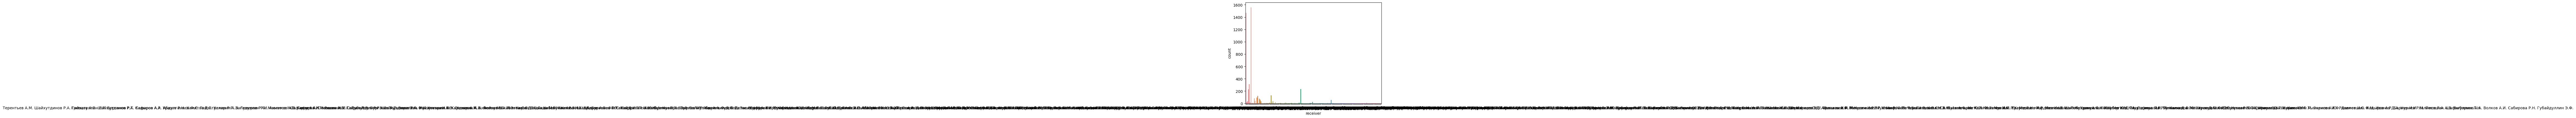

In [627]:
sb.countplot(x=df.receiver)


Для начала соберу отдельно список уникальных получателей


In [628]:
NAME_PATTERN = re.compile('[А-Яа-я]+ [А-Я]\.[А-Я]\.?')


In [629]:
unique_receivers = set()

for receiver in df.receiver:
    recs = NAME_PATTERN.findall(receiver)

    for rec in recs:
        unique_receivers.add(rec)

len(unique_receivers)


280

Получается, что есть 280 разных получателей, какие либо из них могут встречаться только в групповых, а какие то и нет, сейчас это и проверю


Посчитаю, сколько раз автор встречается в группе с кем то, а сколько сольно и потом сравню это. Возможно, можно будет объединить всех групповых получателей в одного коллективного, чтобы сократить их количество и увеличить точность модели


In [630]:
receivers = {}


In [631]:
def split_receiver(receiver: str) -> list[str]:
    return NAME_PATTERN.findall(receiver)


In [632]:
def is_group_receiver(receivers: list[str]) -> bool:
    return len(receivers) > 1


In [633]:
def add_entry(receiver: str, is_group: bool) -> None:
    statistic = receivers.get(receiver)

    if not statistic:
        receivers[receiver] = {'group': 0, 'solo': 0}
        statistic = receivers[receiver]
    if is_group:
        statistic['group'] += 1
    else:
        statistic['solo'] += 1


In [634]:
collective_receivers = 0

for receiver in df.receiver:
    recs = split_receiver(receiver)
    is_group = is_group_receiver(recs)

    for rec in recs:
        add_entry(rec, is_group)

receivers_df = pd.DataFrame(receivers).T


Теперь посмотрим на то, как распределились по группам и как это соотносится с сольным представлением


<Axes: ylabel='group'>

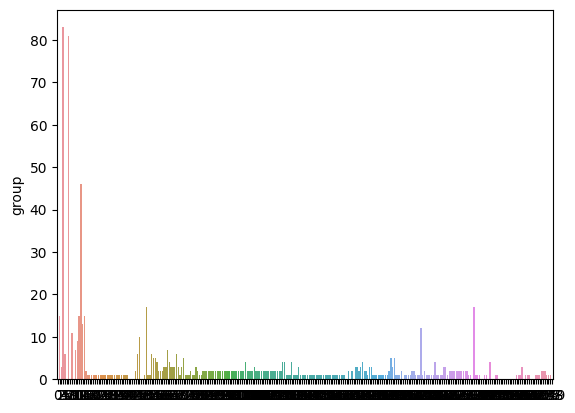

In [635]:
sb.barplot(x=list(range(len(receivers_df.index))), y=receivers_df.group)


Есть некоторые, кто встречаются в группах часто, но большинство только несколько раз


Теперь посмотрю, как дела обстоят с сольными появлениями


<Axes: ylabel='solo'>

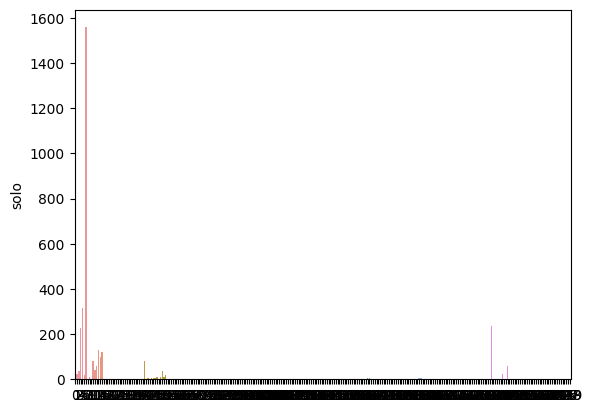

In [636]:
sb.barplot(x=list(range(len(receivers_df.index))), y=receivers_df.solo)


Множество людей упоминаются незначительное количество раз или не упоминаются совсем, по этому имеет смысл всех, кто меньше определенного количества раз упоминается объединить в одного получателя "Прочий"


Что же касается групповых получателей, то тут дело обстоит сложнее, нужно посчитать, сколько раз они встречаются и, скорее всего, тоже объединю их в единого получателя "Коллективный". Как раз начну с этого


In [637]:
GROUP_RECEIVER = 'Коллективный'


def group_collective_receiver(receiver: str) -> str:
    receivers = split_receiver(receiver)
    is_group = is_group_receiver(receivers)
    return GROUP_RECEIVER if is_group else receiver


df.receiver = df.receiver.apply(group_collective_receiver)


In [638]:
df.receiver[df.receiver == GROUP_RECEIVER].value_counts()


receiver
Коллективный    201
Name: count, dtype: int64

<Axes: xlabel='receiver', ylabel='count'>

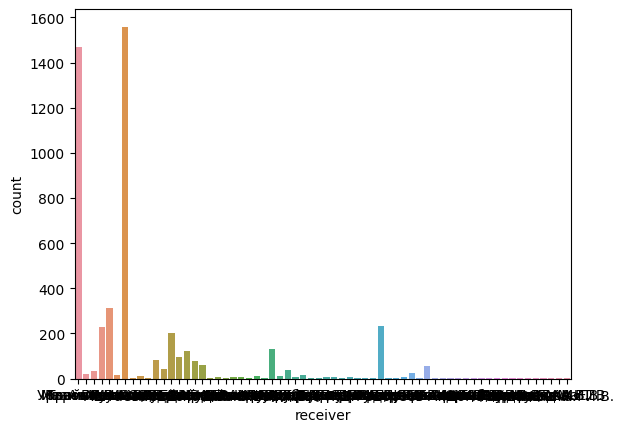

In [639]:
sb.countplot(x=df.receiver)


Так, хорошо, теперь нужно объединить всех остальных. Возьму как значимое число 10% от самой многочисленной группы, то есть от того, кто имеет почти 1600 записей. Все, кто имеет меньше записей будут объединены. Такое число позволит оставить группового получателя отдельно, а из остальных сделать значительную группу для обучения


In [640]:
receivers = df.receiver.value_counts()


In [641]:
large_receiver = receivers[0]
minimal_receiver = large_receiver / 10


In [642]:
deleted_receivers = list(receivers.where(
    lambda count: count <= minimal_receiver).dropna().index)


In [643]:
SMALL_RECEIVER = 'Прочие'


df.receiver = df.receiver.apply(
    lambda receiver: SMALL_RECEIVER if receiver in deleted_receivers else receiver)


<Axes: xlabel='receiver', ylabel='count'>

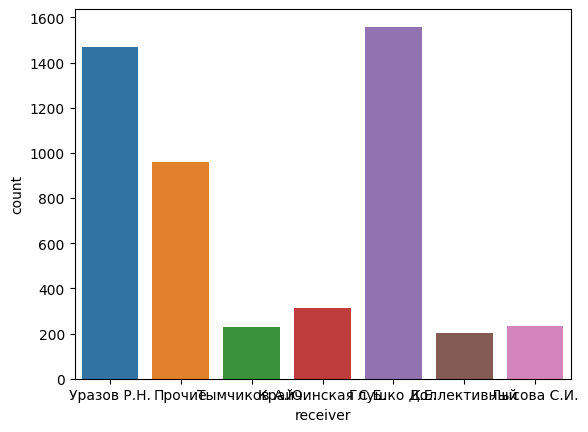

In [644]:
sb.countplot(x=df.receiver)


Теперь данные больше идут в сравнение


Можно потом поиграть с числами, чтобы получить больше или меньше классов


Теперь я закодирую получателей, чтобы работать только с числами


In [645]:
from sklearn.preprocessing import LabelEncoder


In [646]:
receiver_encoder = LabelEncoder()
df.receiver = receiver_encoder.fit_transform(df.receiver)


Обработка теста


In [647]:
df.summary[0]


'Вх - О возможности использования сетевого издания "Информационный ресурс СПАРК" в работе Союза'

Для начала нужно избавиться от приставок Вх в тесте


In [648]:
BX_pattern = re.compile('^Вх - ')


def remove_Bx(text: str) -> str:
    return BX_pattern.sub('', text)


In [649]:
df.summary = df.summary.apply(remove_Bx)


In [650]:
df


,receiver,summary
0,6,"О возможности использования сетевого издания ""..."
1,6,Об участии в совещании по вопросу доработки ФЭ...
2,6,О командировании Саликовой К. и Глушко Д. для ...
3,4,Об участии в Чемпионате мира по профессиональн...
4,6,Об участии в церемонии открытия Вузовского чем...
...,...,...
4962,6,Протокол заседания Президиума Совета при Прези...
4963,6,О проведении 21.11.2017 заседания организацион...
4964,6,Протокол заседания рабочей группы приоритетног...
4965,6,Протокол заседания рабочей группы приоритетног...


Теперь нужно убрать пробелы, знаки препинания, окончания и стоп незначащие слова


In [651]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
%pip install nltk


nltk.download('punkt')
nltk.download('stopwords')



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/bricks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bricks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [652]:
not_ascii_pattern = re.compile("[^a-zA-Z0-9А-Яа-я]+")


def remove_and_tokenize(text: str) -> str:
    text = text.lower()
    text = not_ascii_pattern.sub(' ', text)

    stop = stopwords.words('russian')

    tokens = word_tokenize(text)

    filtered_tokens = []

    for token in tokens:
        if token in stop:
            continue
        filtered_tokens.append(token)

    stemmer = SnowballStemmer('russian')
    filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(filtered_tokens)


In [653]:
df.summary = df.summary.apply(remove_and_tokenize)


In [654]:
df.summary[0]


'возможн использован сетев издан информацион ресурс спарк работ союз'

Отлично, теперь осталось только векторизовать текст


Буду использовать TfidfVectorizer так как он не только считает токены, но и нормализует это число


In [655]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [656]:
df.summary


0       возможн использован сетев издан информацион ре...
1       участ совещан вопрос доработк фэ предоставлен ...
2       командирован саликов глушк д участ заседан орг...
3       участ чемпионат мир профессиональн мастерств с...
4       участ церемон открыт вузовск чемпионат 15 апр ...
                              ...                        
4962    протокол заседан президиум совет президент рф ...
4963    проведен 21 11 2017 заседан организацион комит...
4964    протокол заседан рабоч групп приоритетн проект...
4965    протокол заседан рабоч групп приоритетн проект...
4966    участ чемпионат worldskills hi tech екатеринбу...
Name: summary, Length: 4967, dtype: object

In [657]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.summary)


In [658]:
X = vectorizer.fit_transform(df.summary).toarray()


In [659]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [660]:
df.summary.shape


(4967,)

# Разбиение данных


Еще раз посмотрим на разбиение целевой


<Axes: xlabel='receiver', ylabel='count'>

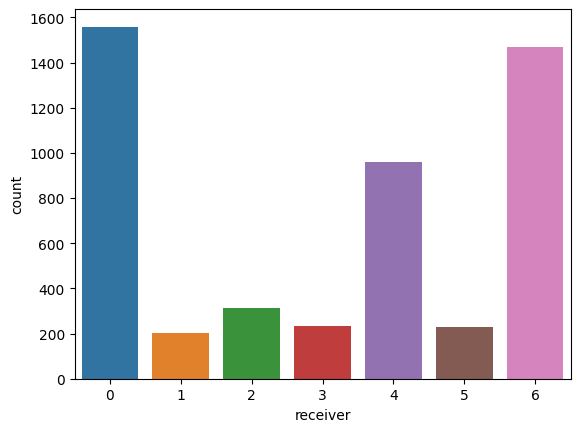

In [661]:
sb.countplot(x=df.receiver)


На графике четко видно, что есть несколько сильновыделяющихся групп, что делает выборку несбалансированной


In [662]:
from sklearn.model_selection import train_test_split


In [663]:
x = X
y = df.receiver


In [664]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42)


# Обучение моделей


In [665]:
from sklearn.metrics import confusion_matrix, classification_report


In [666]:
results = pd.DataFrame(columns=['name', 'score'])
predicts = {}


In [667]:


def get_result(name: str) -> dict:
    result = results[results.name == name].to_numpy()[0]
    return {
        'name': result[0],
        'score': result[1]
    }


In [668]:

def learn_and_score(model, name: str):
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)

    score = round(model.score(x_test, y_test), 4)

    results.loc[len(results)] = {'name': name,
                                 'score': score}
    predicts[name] = predicted

    return score, predicted


In [669]:


def model_report(name: str):
    result = get_result(name)
    predicted = predicts[name]

    print(f'----- {name} -----')
    print('Accuracy score: {}%'.format(result['score'] * 100))
    print(classification_report(y_test, predicted))
    print('Confusion matrix')
    sb.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='.1f')
    print('----------------------')


In [690]:


def total_report():
    sb.barplot(results, y='name', x='score')


## Случайный лес


Начну с модели случайного леса, так как она может хорошо справляться с несбалансированной выборкой


In [671]:
from sklearn.ensemble import RandomForestClassifier


In [672]:
random_forest = RandomForestClassifier(random_state=12, n_jobs=-2)
RANDOM_FOREST = 'random_forest'

learn_and_score(random_forest, RANDOM_FOREST)


(0.7129, array([0, 6, 3, ..., 6, 0, 0]))

----- random_forest -----
Accuracy score: 71.28999999999999%
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       468
           1       0.53      0.17      0.25        60
           2       0.82      0.47      0.60        95
           3       0.76      0.74      0.75        70
           4       0.72      0.60      0.65       289
           5       0.44      0.17      0.25        69
           6       0.65      0.84      0.73       440

    accuracy                           0.71      1491
   macro avg       0.67      0.55      0.58      1491
weighted avg       0.71      0.71      0.70      1491

Confusion matrix
----------------------


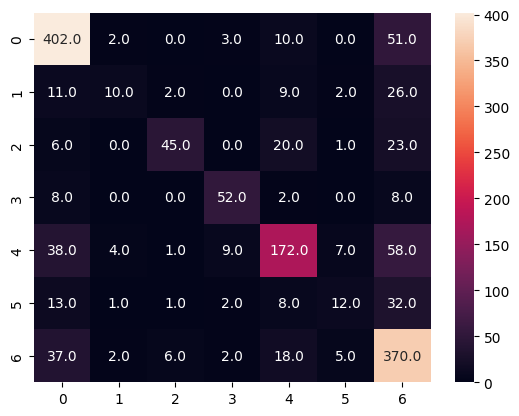

In [673]:
model_report(RANDOM_FOREST)


Очень хорошая точность для начала, даже для некоторых малочисленных классов, барьер чувствительности находится в районе 60-70 единиц, судя по всему


## Дерево решений


Попробую теперь дерево решений, потому что иногда оно показывает себя лучше и быстрее леса


In [674]:
from sklearn.tree import DecisionTreeClassifier


In [675]:
tree = DecisionTreeClassifier(random_state=42)
TREE = 'tree'
learn_and_score(tree, TREE)


(0.6318, array([0, 6, 3, ..., 6, 6, 0]))

----- tree -----
Accuracy score: 63.18%
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       468
           1       0.20      0.15      0.17        60
           2       0.72      0.60      0.66        95
           3       0.65      0.69      0.67        70
           4       0.63      0.58      0.60       289
           5       0.28      0.25      0.26        69
           6       0.60      0.66      0.63       440

    accuracy                           0.63      1491
   macro avg       0.54      0.53      0.53      1491
weighted avg       0.63      0.63      0.63      1491

Confusion matrix
----------------------


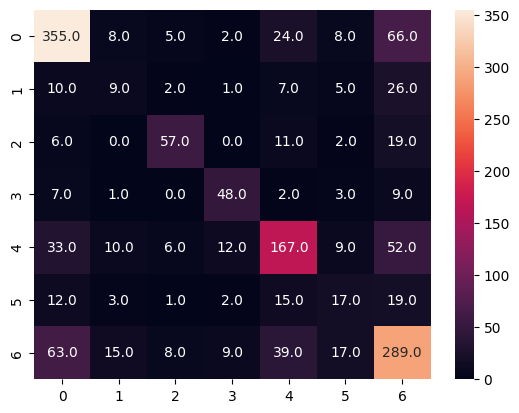

In [676]:
model_report(TREE)


В единоличном виде дерево показало себя хуже леса в среднем и большинстве классов, но в одном результат стал несколько лучше. Возможно, с более мелким дроблением дерево покажет себя лучше


## Соседи


Соседи считает отличным алгоритмом для классификации. Его часто используют при работе с текстом


In [677]:
from sklearn.neighbors import KNeighborsClassifier


In [678]:
neighbors = KNeighborsClassifier(n_jobs=-1)
NEIGHBORS = 'neighbors'
learn_and_score(neighbors, NEIGHBORS)


(0.6673, array([0, 0, 3, ..., 2, 0, 0]))

----- neighbors -----
Accuracy score: 66.73%
              precision    recall  f1-score   support

           0       0.68      0.88      0.76       468
           1       0.42      0.17      0.24        60
           2       0.62      0.52      0.56        95
           3       0.60      0.74      0.67        70
           4       0.64      0.65      0.64       289
           5       0.31      0.14      0.20        69
           6       0.75      0.63      0.68       440

    accuracy                           0.67      1491
   macro avg       0.57      0.53      0.54      1491
weighted avg       0.66      0.67      0.65      1491

Confusion matrix
----------------------


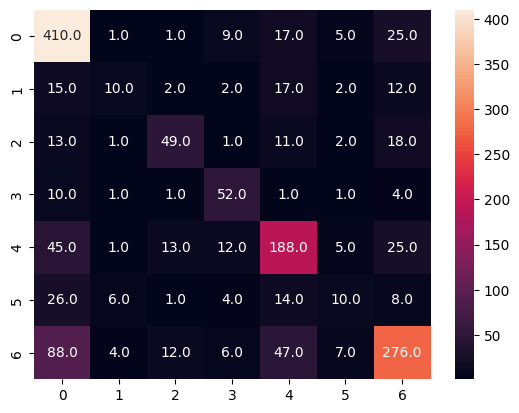

In [679]:
model_report(NEIGHBORS)


Средний результат немного превосходит дерево, но результаты по классам хуже всех


## Наивный Байес


Тоже популярная модель для классификации и довольно быстро работает. Иногда, при работе с текстом, показывает себя лучше леса


In [680]:
from sklearn.naive_bayes import MultinomialNB


In [681]:
bayes = MultinomialNB()
BAYES = 'bayes'
learn_and_score(bayes, BAYES)


(0.6224, array([0, 6, 0, ..., 6, 0, 0]))

----- bayes -----
Accuracy score: 62.239999999999995%
              precision    recall  f1-score   support

           0       0.59      0.90      0.72       468
           1       0.00      0.00      0.00        60
           2       1.00      0.26      0.42        95
           3       1.00      0.06      0.11        70
           4       0.63      0.48      0.55       289
           5       0.00      0.00      0.00        69
           6       0.64      0.77      0.70       440

    accuracy                           0.62      1491
   macro avg       0.55      0.35      0.35      1491
weighted avg       0.61      0.62      0.57      1491

Confusion matrix
----------------------


/home/bricks/Documents/python/big-data/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bricks/Documents/python/big-data/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bricks/Documents/python/big-data/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

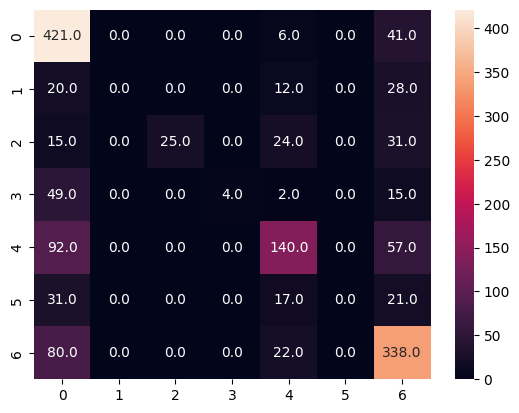

In [682]:
model_report(BAYES)


Алгоритм сработал, на удивление, плохо. Некоторые классы по нулям. Скорее всего сказывается разбиение данных или небольшая выборка по этим классам в целом


## Пассивно агрессивный классификатор


Впервые о нем прочитал и мне понравилось название. Плюс он относится к линейным алгоритмам, а до этого ни один из них я не применял. Возможно, он справится лучше


In [683]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [684]:
passive_aggressive = PassiveAggressiveClassifier(n_jobs=-1)
PASSIVE_AGGRESSIVE = 'passive_aggressive'
learn_and_score(passive_aggressive, PASSIVE_AGGRESSIVE)


(0.6727, array([0, 6, 3, ..., 6, 0, 0]))

----- passive_aggressive -----
Accuracy score: 67.27%
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       468
           1       0.24      0.15      0.18        60
           2       0.63      0.59      0.61        95
           3       0.68      0.71      0.70        70
           4       0.63      0.63      0.63       289
           5       0.31      0.30      0.31        69
           6       0.69      0.70      0.69       440

    accuracy                           0.67      1491
   macro avg       0.56      0.56      0.56      1491
weighted avg       0.66      0.67      0.67      1491

Confusion matrix
----------------------


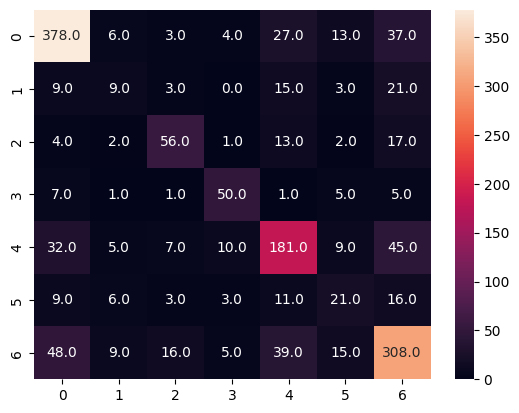

In [685]:
model_report(PASSIVE_AGGRESSIVE)


Неплохая точность, на уровне с лесом, но хуже по некоторым классовым предсказаниям


## Скалярные вектора


Попробую метод с векторами, тоже несколько другой алгоритм, схож с соседями, но иногда показывает себя лучше


In [686]:
from sklearn.svm import SVC


In [687]:
svc = SVC(random_state=42)
C_SVC = 'svc'
learn_and_score(svc, C_SVC)


(0.7129, array([0, 6, 3, ..., 6, 0, 0]))

----- svc -----
Accuracy score: 71.28999999999999%
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       468
           1       0.75      0.05      0.09        60
           2       0.97      0.38      0.55        95
           3       0.72      0.63      0.67        70
           4       0.72      0.63      0.67       289
           5       0.58      0.10      0.17        69
           6       0.62      0.90      0.73       440

    accuracy                           0.71      1491
   macro avg       0.74      0.50      0.53      1491
weighted avg       0.73      0.71      0.69      1491

Confusion matrix
----------------------


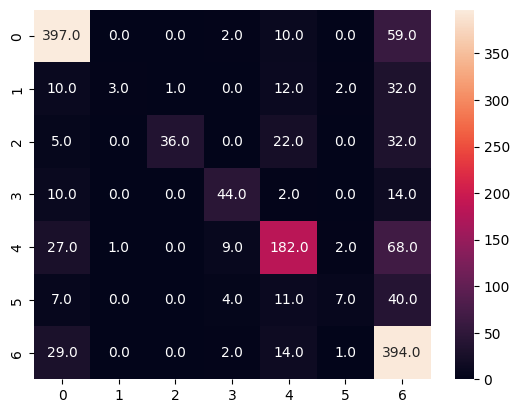

In [688]:
model_report(C_SVC)


Модель показала себя очень хорошо в целом, но плохо предсказывает малочисленные классы. Так же долго обучается, что сделает затруднительным подбор гиперпараметров


# Промежуточные итоги


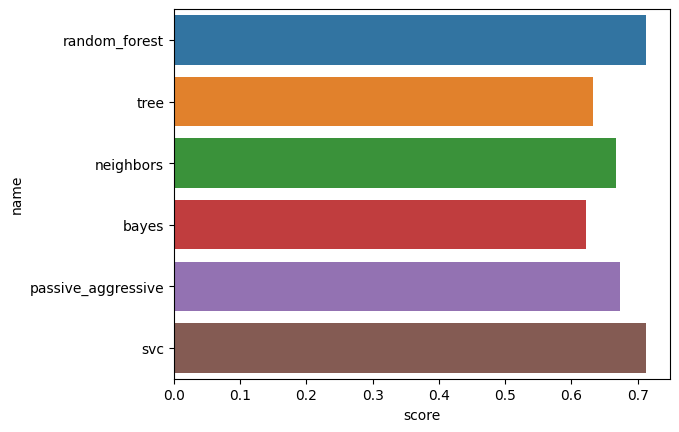

In [691]:
total_report()


Расклад отличный, для улучшения возьму две модели: Случайный лес и пассивно агрессивную. Не будут брать вектора, потому что они практически такие же, как и лес, но учатся в несколько раз дольше. А пассивно агрессивную возьму, потому что она нова для меня


# Гиперпараметры


In [695]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [696]:
def random_search(model, params):
    searcher = RandomizedSearchCV(
        model, params, cv=5, n_jobs=-2, random_state=42, return_train_score=True,)
    searcher.fit(x_train, y_train)

    results = pd.DataFrame(searcher.cv_results_).sort_values(
        ascending=True, by='mean_test_score')
    return results


In [697]:
def results_report(results: pd.DataFrame, in_row: int = 3):
    filtered_columns = list(
        filter(lambda column: column.startswith('param_'), results.columns))

    rows_count = math.ceil(len(filtered_columns) / in_row)

    fig, axs = mpl.subplots(rows_count, in_row)

    for index, column in enumerate(filtered_columns):
        row = index // in_row
        col = index % in_row
        sb.barplot(results, x=column, y='mean_test_score', ax=axs[row, col])


In [698]:
def grid_search(model, params):
    searcher = GridSearchCV(model, params, cv=5)
    searcher.fit(x_train, y_train)
    return searcher.best_params_


## Случайный лес


In [705]:
random_forest_params = {
    'n_estimators': np.arange(50, 300, 50),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 20, 2),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [706]:
base_forest = RandomForestClassifier(random_state=42, n_jobs=-1,)
forest_results = random_search(base_forest, random_forest_params)


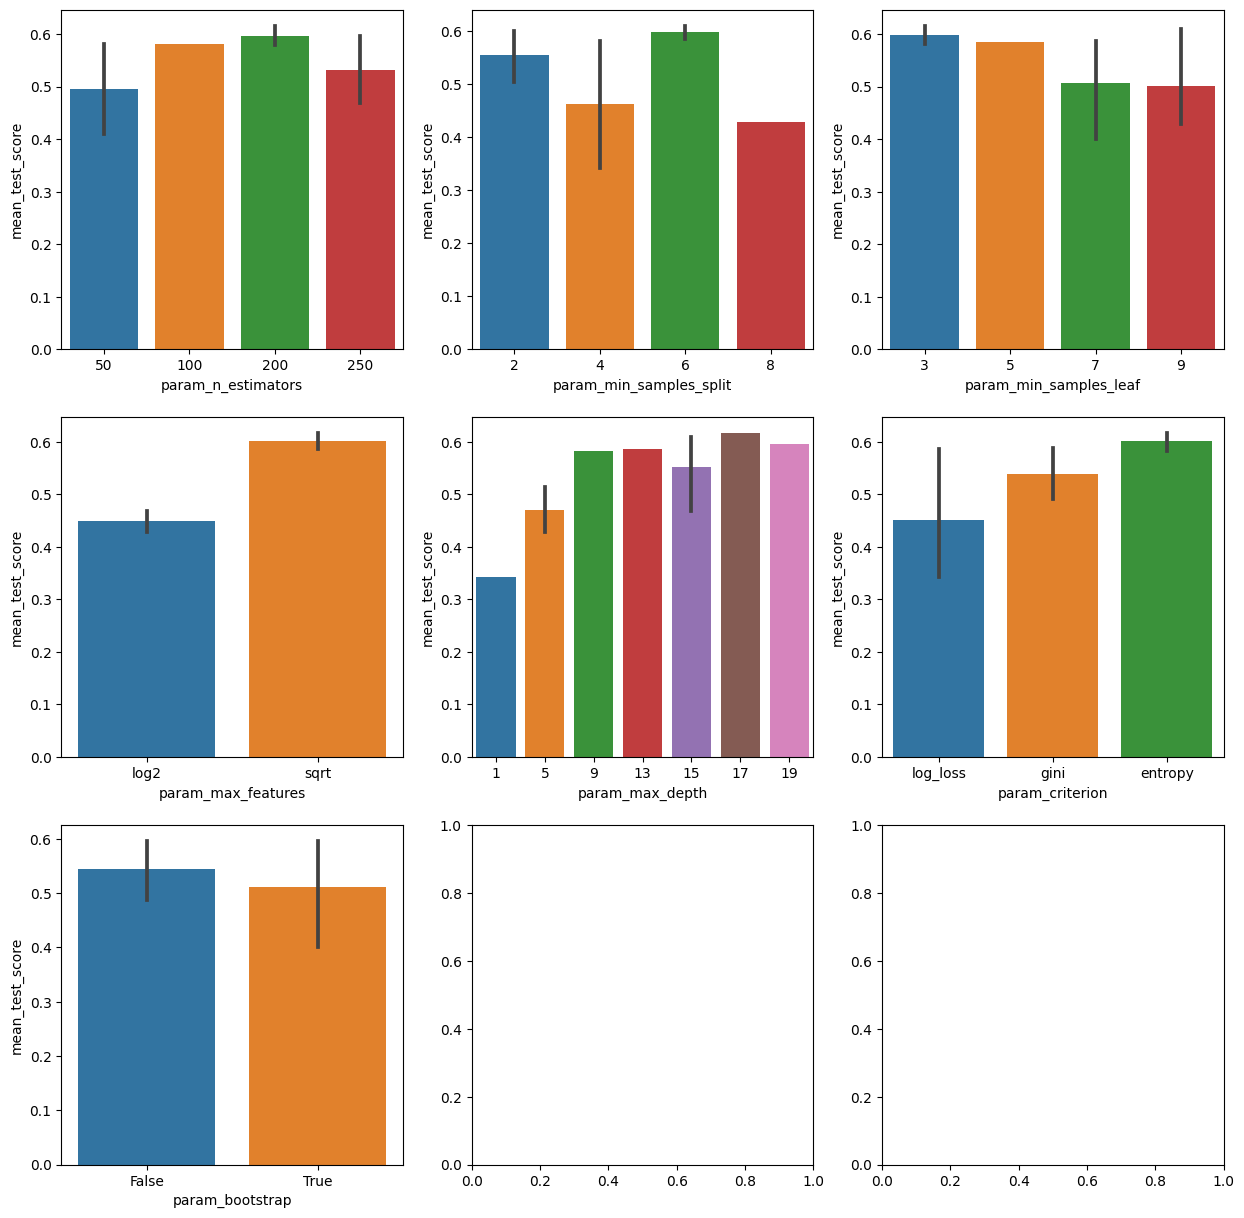

In [707]:
results_report(forest_results)


Точно можно сказать, что:

- bootstrap - False
- max_features - sqrt
- criterion - entropy

  Нужно еще перебрать:

- max_depth - between 16 and 18
- n_estimators - between 180 and 230
- min_samples_leaf - between 1 and 4
- min_samples_split - between 5 and 8


In [709]:
prebest_forest_params = {
    'bootstrap': False,
    'max_features': 'sqrt',
    "criterion": 'entropy'
}

grid_forest_params = {
    'max_depth': np.arange(16, 18, 1),
    'n_estimators': np.arange(180, 230, 10),
    'min_samples_leaf': np.arange(1, 4, 1),
    'min_samples_split': np.arange(5, 8, 1)
}


In [710]:
prebest_forest = RandomForestClassifier(
    random_state=42, n_jobs=-2, **prebest_forest_params)
best_forest_params = grid_search(prebest_forest, grid_forest_params)


In [711]:
best_forest = RandomForestClassifier(
    random_state=42, n_jobs=-2, **prebest_forest_params, **best_forest_params)
BEST_FOREST = 'best_forest'
learn_and_score(best_forest, BEST_FOREST)


(0.6419, array([0, 6, 0, ..., 6, 0, 0]))

----- best_forest -----
Accuracy score: 64.19%
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       468
           1       0.00      0.00      0.00        60
           2       1.00      0.32      0.48        95
           3       0.81      0.43      0.56        70
           4       0.82      0.43      0.56       289
           5       1.00      0.01      0.03        69
           6       0.53      0.89      0.66       440

    accuracy                           0.64      1491
   macro avg       0.70      0.41      0.44      1491
weighted avg       0.69      0.64      0.60      1491

Confusion matrix
----------------------


/home/bricks/Documents/python/big-data/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bricks/Documents/python/big-data/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bricks/Documents/python/big-data/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

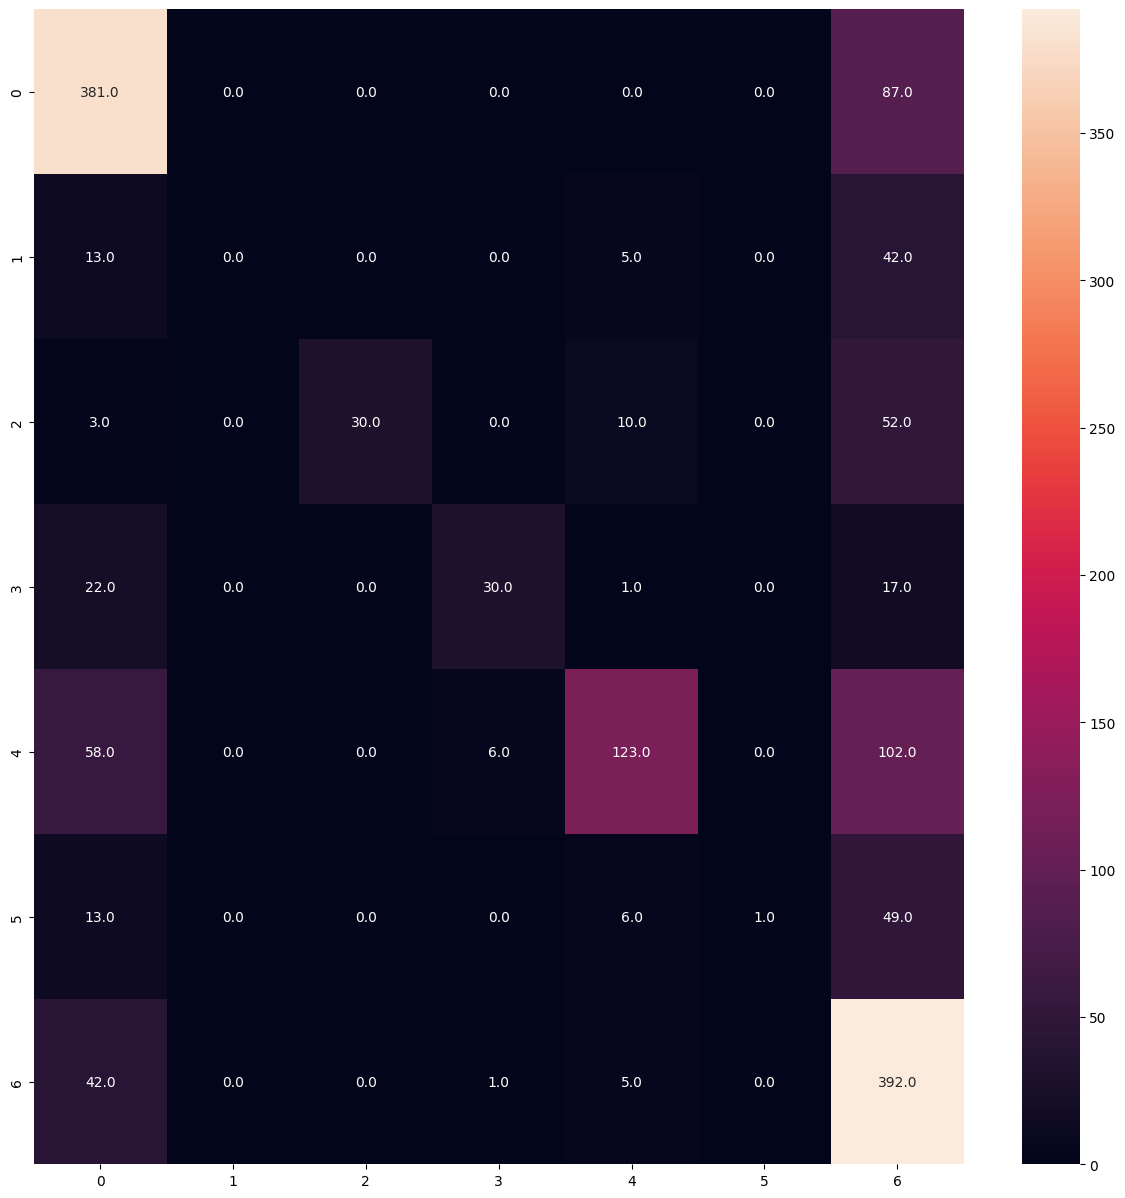

In [712]:
model_report(BEST_FOREST)


Попытки подобрать гиперпараметры не увенчалась успехом, лучше всего использовать стандартные настройки


## Пассивно агрессивный классификатор


In [716]:
random_pa_params = {
    'C': np.arange(0.1, 2, 0.2),
    'fit_intercept': [True, False],
    'early_stopping': [True, False],
    'shuffle': [True, False],
    'tol': np.arange(1e-4, 1e-2, 5e-4),
    'validation_fraction': np.arange(0.1, 1, 0.2),
    'loss': ['hinge', 'squared_hinge']
}


In [717]:
base_pa = PassiveAggressiveClassifier(random_state=42, n_jobs=-2)
pa_results = random_search(base_pa, random_pa_params)

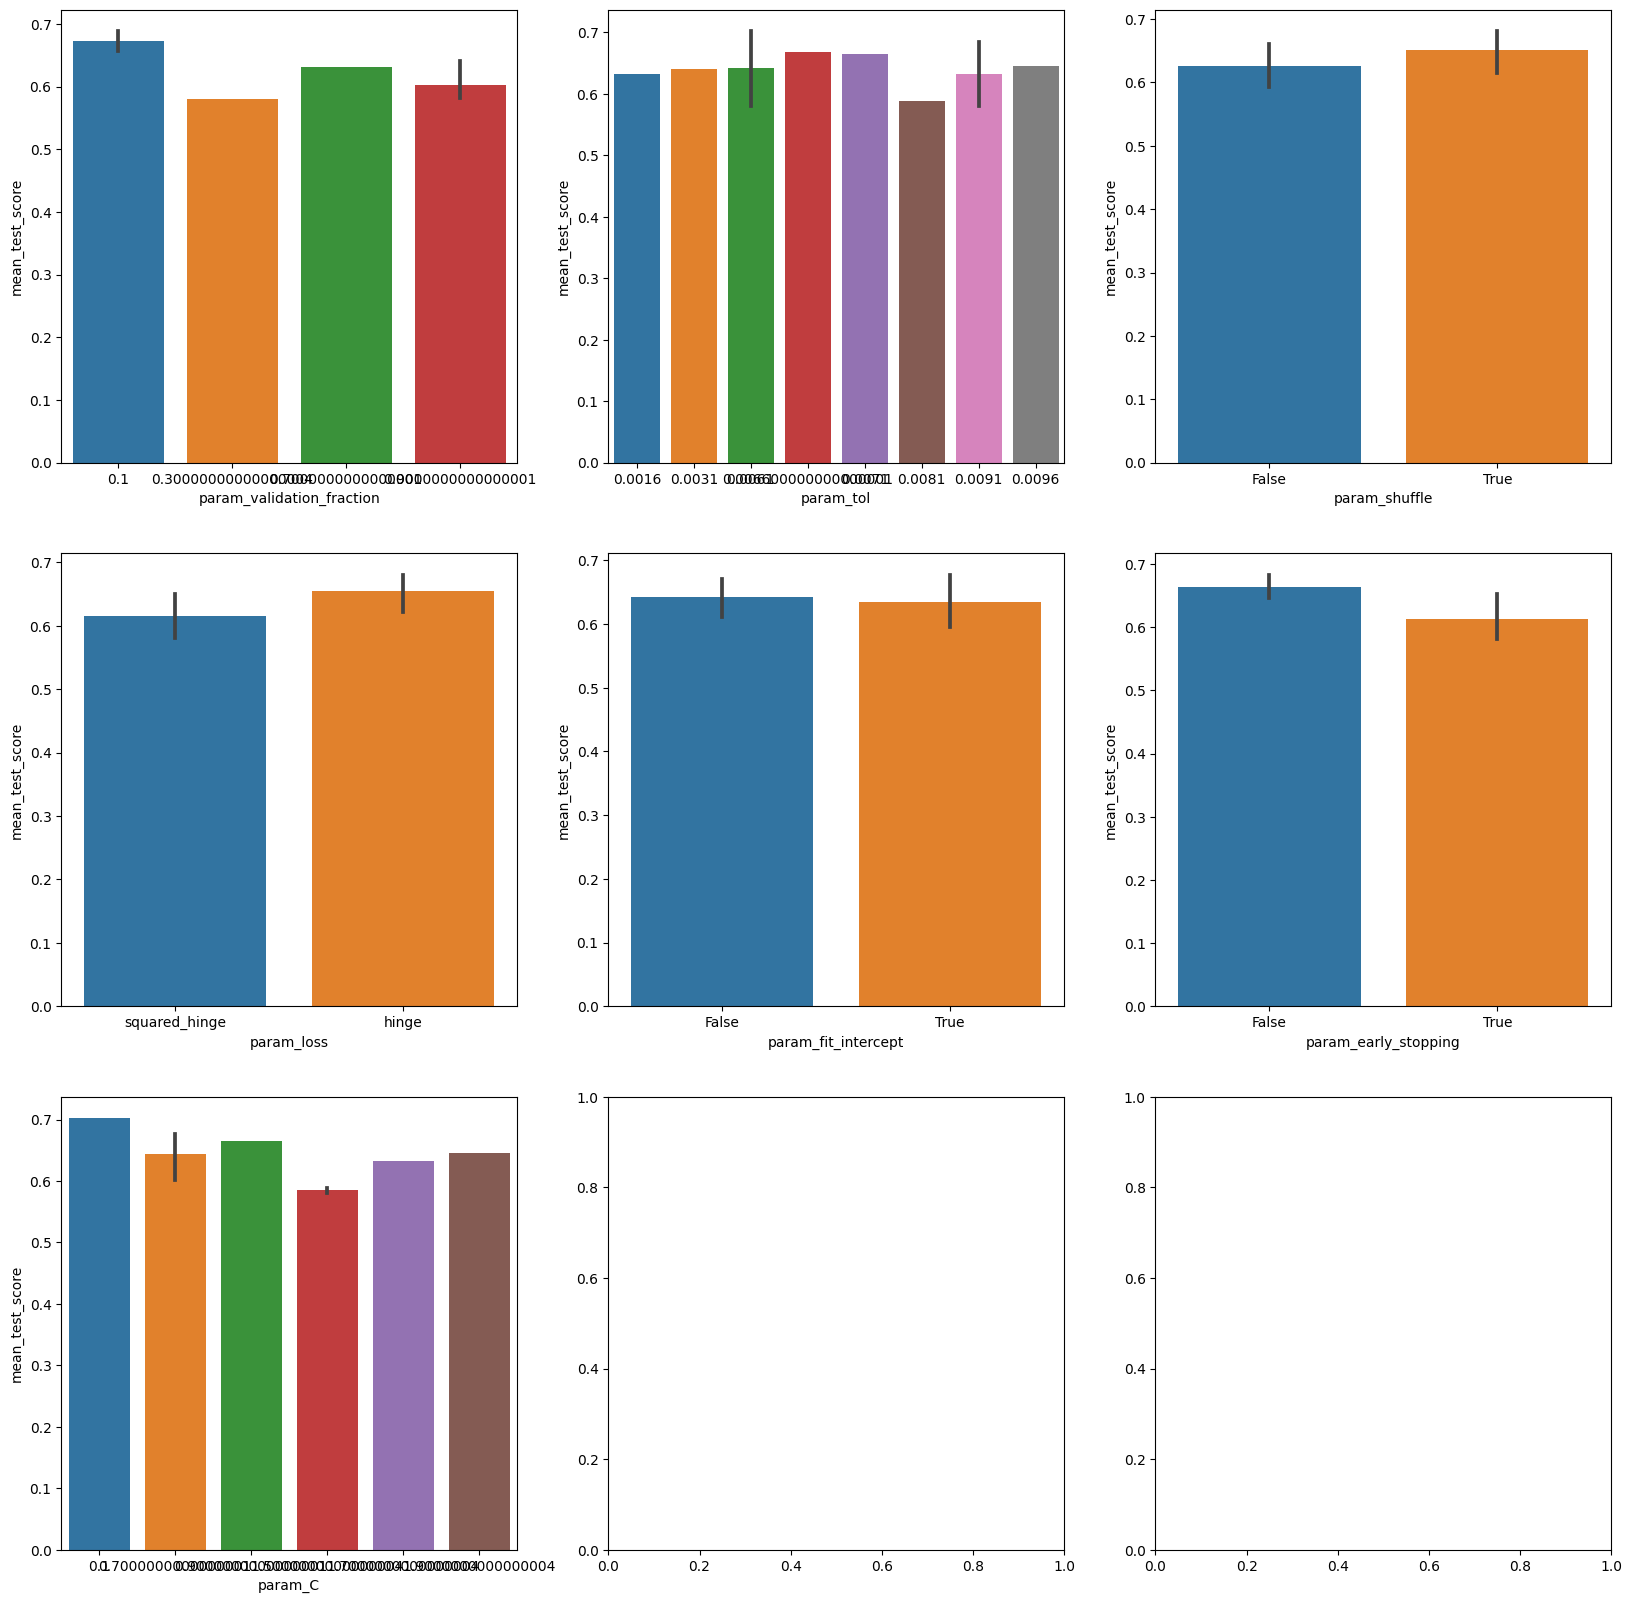

In [719]:
figsize(20, 20)
results_report(pa_results)

Точно можно сказать, что:

- shuffle - True
- loss - hinge
- fit_intercept - False
- early_stopping - False

Нужно проверить еще:

- validation_fraction - between 0.02 and 0.2
- C - between 0.02 and 0.3
- tol - between 0.0041 and 0.0081


In [720]:
prebest_pa_params = {
    'shuffle': True,
    'loss': 'hinge',
    'fit_intercept': False,
    'early_stopping': False
}

grid_pa_params = {
    'validation_fraction': np.arange(0.02, 0.2, 0.04),
    'C': np.arange(0.02, 0.3, 0.04),
    'tol': np.arange(0.0041, 0.0081, 0.001)
}


In [721]:
prebest_pa = PassiveAggressiveClassifier(random_state=42, n_jobs=-2, **prebest_pa_params)
best_pa_params = grid_search(prebest_pa, grid_pa_params)

In [722]:
best_pa = PassiveAggressiveClassifier(random_state=42, n_jobs=-2, **prebest_pa_params, **best_pa_params)
BEST_PA = 'best_pa'
learn_and_score(best_pa, BEST_PA)

(0.6915, array([0, 6, 3, ..., 6, 0, 0]))

----- best_pa -----
Accuracy score: 69.15%
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       468
           1       0.35      0.10      0.16        60
           2       0.77      0.53      0.62        95
           3       0.67      0.74      0.70        70
           4       0.62      0.62      0.62       289
           5       0.43      0.19      0.26        69
           6       0.68      0.75      0.71       440

    accuracy                           0.69      1491
   macro avg       0.61      0.54      0.55      1491
weighted avg       0.67      0.69      0.67      1491

Confusion matrix
----------------------


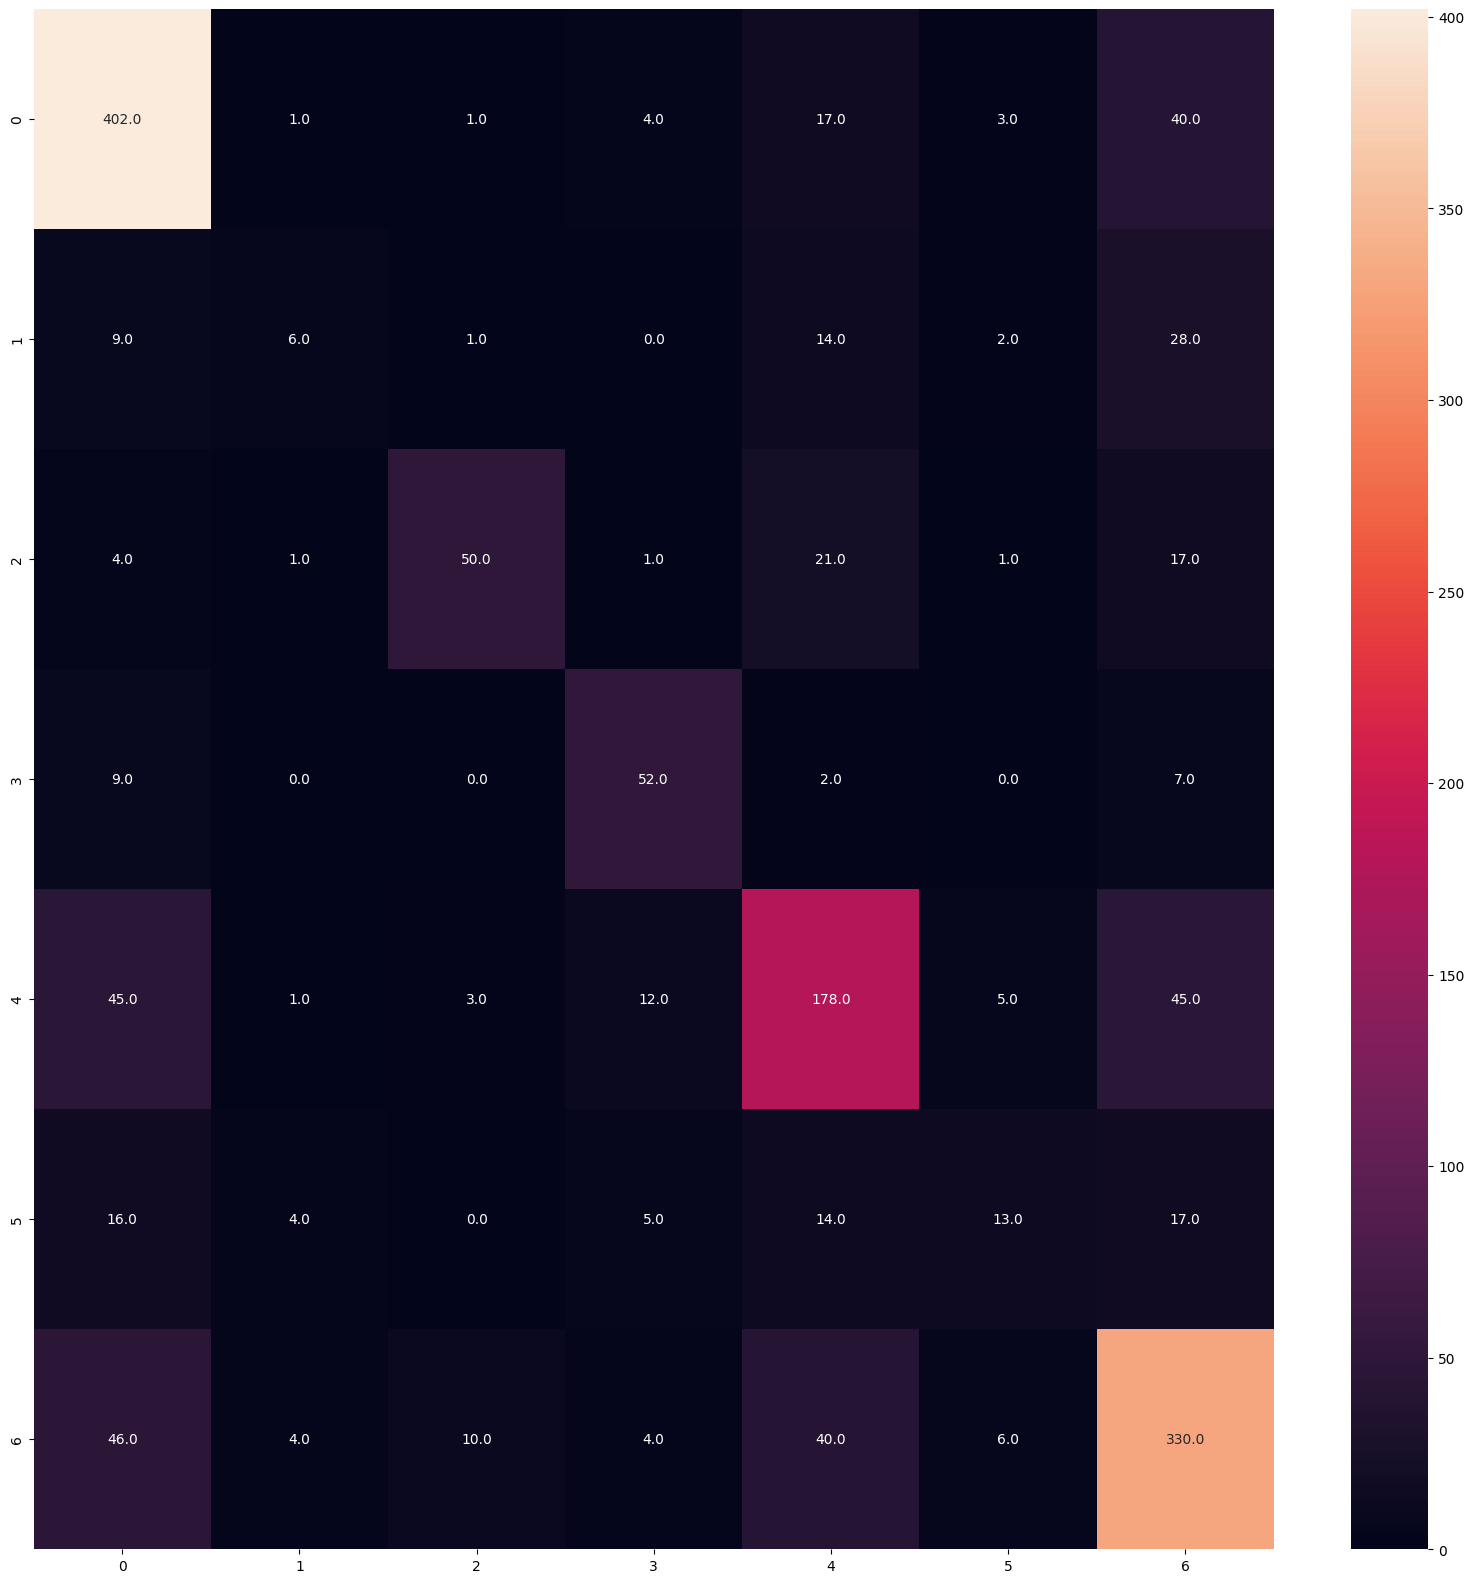

In [723]:
model_report(BEST_PA)

Общая точность модели стала больше, но при этом предсказания малочисленных классов стали хуже

# Итоги

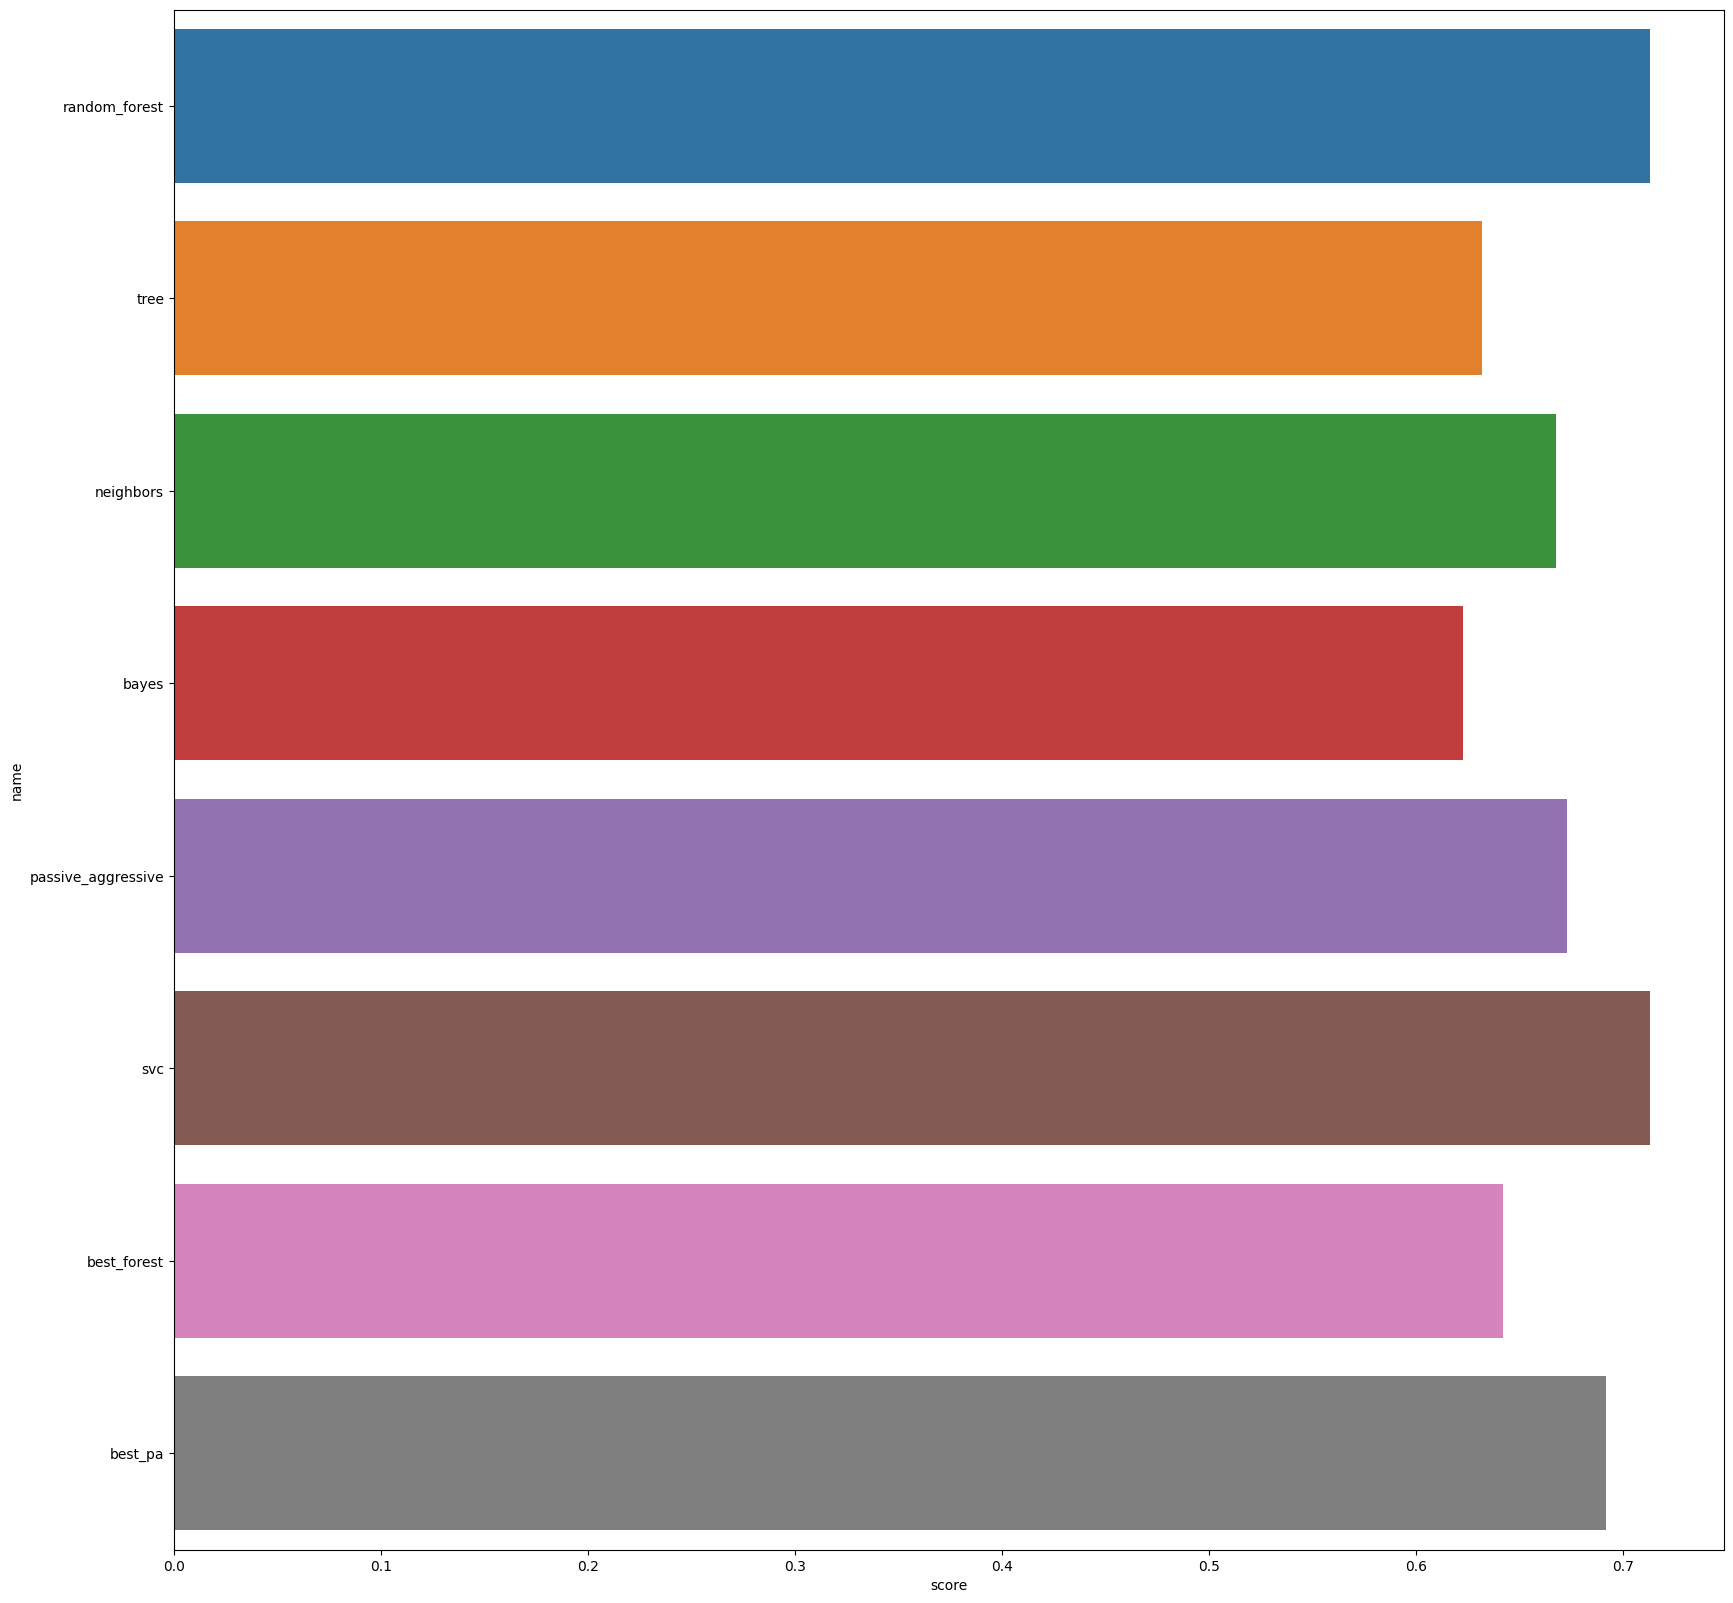

In [724]:
total_report()

Лучше всего по общей точности, точности малочисленных классов и времени работы является лес. Если можно пожертвовать общей точностью, в пользу большей точности в малых классах, то следует выбрать пассивно агрессивную базовую модель
